In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [2]:
data = pd.read_csv("D:VOF.L.csv")

In [3]:
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,272.0,275.00,272.00,273.25,233.939148,170046
1,2017-01-04,272.0,275.00,272.00,272.75,233.511093,107823
2,2017-01-05,272.0,274.50,270.25,272.50,233.297043,391623
3,2017-01-06,272.5,273.75,266.00,273.00,233.725098,464329
4,2017-01-09,273.0,273.50,270.00,273.50,234.153183,276108


In [4]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [5]:
ata.info()

NameError: name 'ata' is not defined

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1328 non-null   object 
 1   Open       1328 non-null   float64
 2   High       1328 non-null   float64
 3   Low        1328 non-null   float64
 4   Close      1328 non-null   float64
 5   Adj Close  1328 non-null   float64
 6   Volume     1328 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 72.8+ KB


In [7]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1328, 1)

In [8]:
X_train = []
y_train = []

for i in range (60,252): #60 : timestep // 1149 : Length of the data
  X_train.append(trainData[i-60:i,0])
  y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [9]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(192, 60, 1)

In [10]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units = 1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [11]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
6/6 - 6s - loss: 0.0245 - 6s/epoch - 1s/step
Epoch 2/20
6/6 - 0s - loss: 0.0094 - 393ms/epoch - 65ms/step
Epoch 3/20
6/6 - 0s - loss: 0.0027 - 400ms/epoch - 67ms/step
Epoch 4/20
6/6 - 0s - loss: 0.0016 - 463ms/epoch - 77ms/step
Epoch 5/20
6/6 - 0s - loss: 0.0018 - 383ms/epoch - 64ms/step
Epoch 6/20
6/6 - 0s - loss: 0.0017 - 381ms/epoch - 63ms/step
Epoch 7/20
6/6 - 0s - loss: 0.0011 - 393ms/epoch - 65ms/step
Epoch 8/20
6/6 - 0s - loss: 0.0010 - 422ms/epoch - 70ms/step
Epoch 9/20
6/6 - 0s - loss: 0.0012 - 388ms/epoch - 65ms/step
Epoch 10/20
6/6 - 0s - loss: 0.0010 - 384ms/epoch - 64ms/step
Epoch 11/20
6/6 - 0s - loss: 8.7830e-04 - 378ms/epoch - 63ms/step
Epoch 12/20
6/6 - 0s - loss: 0.0010 - 379ms/epoch - 63ms/step
Epoch 13/20
6/6 - 0s - loss: 9.2551e-04 - 378ms/epoch - 63ms/step
Epoch 14/20
6/6 - 0s - loss: 7.8010e-04 - 375ms/epoch - 63ms/step
Epoch 15/20
6/6 - 0s - loss: 9.5679e-04 - 383ms/epoch - 64ms/step
Epoch 16/20
6/6 - 0s - loss: 8.6398e-04 - 385ms/epoch - 64ms/step
Ep

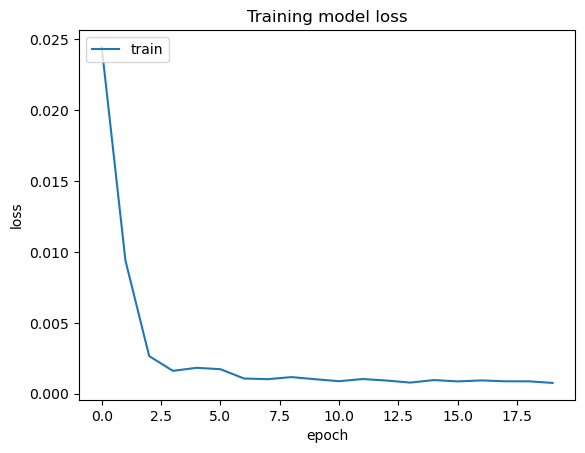

In [12]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [13]:
testData = pd.read_csv('DATA.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length) :
  X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test =np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

FileNotFoundError: [Errno 2] No such file or directory: 'DATA.csv'

In [14]:
testData = pd.read_csv('D:VOF.L.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length) :
  X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test =np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(1268, 60, 1)

In [15]:
y_pred = model.predict(X_test)
y_pred

40/40 [==============================] - 3s 28ms/step


array([[0.22765772],
       [0.22844344],
       [0.22912548],
       ...,
       [0.5984649 ],
       [0.59913826],
       [0.6001539 ]], dtype=float32)

In [16]:
predicted_price = sc.inverse_transform(y_pred)

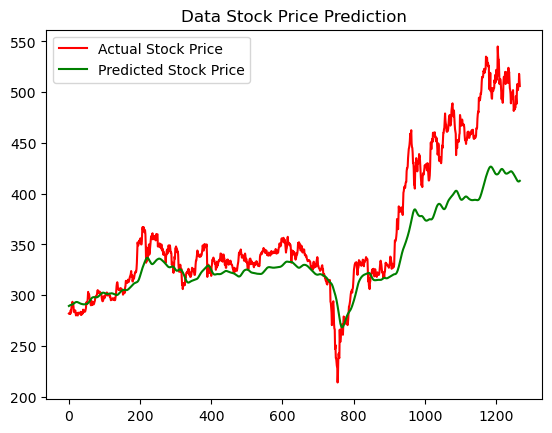

In [17]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Data Stock Price Prediction')
plt.xlabel
plt.ylabel
plt.legend()
plt.show()